# CHAPTER 1 Fundamentals
## 1.1 Basic Programming Model
Example of binary search:

In [4]:
def rank(key, a):
    '''
    Core function of binary search.
    Array must be sorted.
    '''
    lo = 0
    hi = len(a) - 1;
    while lo <= hi:
        mid = lo + (hi - lo)/2
        if   key < a[mid]: hi = mid - 1
        elif key > a[mid]: lo = mid + 1
        else             : return mid
    return -1

Unit-test modules for the binary search are as follows,

* Load testing data

In [15]:
import numpy as np
testdata  = (np.loadtxt("./tinyT.txt")).tolist()
whitelist = (np.loadtxt("./tinyW.txt")).tolist()
print(testdata)
print(whitelist)

[23.0, 50.0, 10.0, 99.0, 18.0, 23.0, 98.0, 84.0, 11.0, 10.0, 48.0, 77.0, 13.0, 54.0, 98.0, 77.0, 77.0, 68.0]
[84.0, 48.0, 68.0, 10.0, 18.0, 98.0, 12.0, 23.0, 54.0, 57.0, 48.0, 33.0, 16.0, 77.0, 11.0, 29.0]


* Sort the whitelist

In [16]:
whitelist.sort()
print(whitelist)

[10.0, 11.0, 12.0, 16.0, 18.0, 23.0, 29.0, 33.0, 48.0, 48.0, 54.0, 57.0, 68.0, 77.0, 84.0, 98.0]


* Invoke rank() to do searching

In [18]:
for key in testdata:
    if rank(key, whitelist) < 0:
        print(str(key) + " is not in the whitelist.")

50.0 is not in the whitelist.
99.0 is not in the whitelist.
13.0 is not in the whitelist.


***

Three examples of plotting:

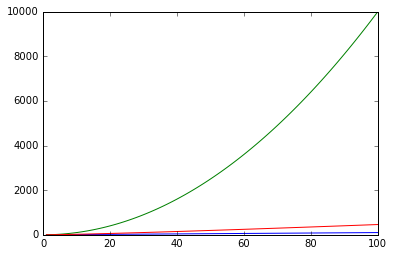

In [19]:
# function values
%matplotlib inline
import matplotlib.pylab as plt
import math

N = 100
x = []
y_1 = []
y_n2 = []
y_nlogn = []
for i in range(1, N+1):
    x.append(i)
    y_1.append(i)
    y_n2.append(i*i)
    y_nlogn.append(i*math.log(i))

plt.figure()
plt.plot(x, y_1)
plt.plot(x, y_n2)
plt.plot(x, y_nlogn)
plt.show()

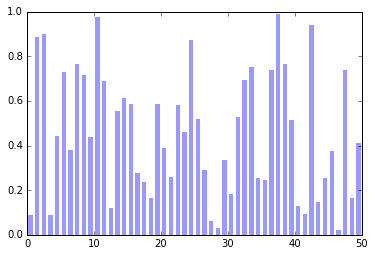

In [26]:
# array of random values
%matplotlib inline
import matplotlib.pylab as plt
import random
import math

N = 50
x = []
y = []
for i in range(N):
    x.append(i)
    y.append(random.random())
    
plt.figure()
plt.bar(x, y, facecolor='#9999ff', edgecolor='white')
plt.show()

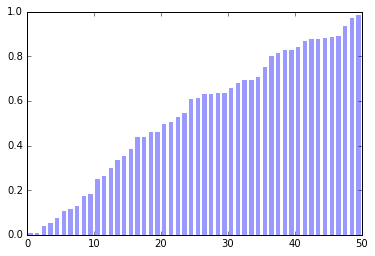

In [27]:
# sorted array of random values
%matplotlib inline
import matplotlib.pylab as plt
import random
import math

N = 50
x = []
y = []
for i in range(N):
    x.append(i)
    y.append(random.random())

y.sort()
    
plt.figure()
plt.bar(x, y, facecolor='#9999ff', edgecolor='white')
plt.show()

---